In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


# UPLOAD da Base de Dados Chicago Crime
Para conseguir acessar as informações do BigQuery por meio do Colab foi necessario fazer algumas configurações na conta que será usada para fazer o acesso às informações.<br>
1) Precisamos acessar o [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) para criar um projeto;<br>
2) [Habilitar a API do BigQuery para esse projeto](https://console.cloud.google.com/flows/enableapi?apiid=bigquery).<br><br>

Obs.: Segundo [esse material](https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=KcAZ2RHCg_Ze) seria necessário habilitar a cobrança para o projeto. Contudo, essa etapa não foi necessária para extrair essas informações nesse notebook.<br>

<font color='orange'> Pode ser que os usuários free possuam uma certa quantidade de processamento de forma gratuita ou o pelo fato dos dados estarem disponíveis em meio aos dados públicos do Google nenhuma cobrança é realizada.






In [3]:
# Download do pacote que possibilita um grande numero de pandas dataframes
%load_ext google.colab.data_table

In [4]:
# Download da base de dados utilizada nesse trabalho - Chicago_crime
%%bigquery --project tcc-maria-leticia df
SELECT 
  *
FROM `bigquery-public-data.chicago_crime.crime`
WHERE DATE(date) >= '2018-01-01'

Por padrão são exibidas no máximo 20 colunas, dessa forma usamos a extensão abaixo para exibir todas as 22 colunas do arquivo.

In [5]:
from google.colab.data_table import DataTable
DataTable.max_columns = 22

In [6]:
# Visualizar as primeiras 5 linhas da tabela com os dados
df.head(5)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,11754235,JC344459,2019-07-11 01:00:00+00:00,006XX E 131ST ST,1340,CRIMINAL DAMAGE,TO STATE SUP PROP,CHA APARTMENT,False,False,...,9.0,54.0,14,1183077.0,1818560.0,2019,2019-07-19 04:09:50+00:00,41.657323,-87.605741,"(41.657322883, -87.605741042)"
1,11878062,JC489708,2019-07-12 08:00:00+00:00,036XX S HERMITAGE AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,12.0,59.0,11,1165278.0,1880651.0,2019,2019-11-03 03:50:02+00:00,41.828104,-87.669117,"(41.828103571, -87.669117016)"
2,11826405,JC431092,2019-09-13 12:40:00+00:00,001XX W 35TH ST,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,CTA PLATFORM,False,False,...,11.0,34.0,04A,1175739.0,1881773.0,2019,2019-09-20 04:01:26+00:00,41.830954,-87.630703,"(41.830954079, -87.630703226)"
3,11839509,JC446735,2019-09-01 12:00:00+00:00,106XX S AVENUE M,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,False,...,10.0,52.0,26,1201520.0,1834968.0,2019,2019-09-27 04:00:25+00:00,41.701901,-87.537702,"(41.701901013, -87.537701855)"
4,11759413,JC350783,2019-07-16 12:00:00+00:00,035XX S LEAVITT ST,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,CTA PLATFORM,False,False,...,12.0,59.0,14,1162269.0,1881166.0,2019,2019-07-23 04:21:39+00:00,41.829580,-87.680142,"(41.829580097, -87.680142381)"


In [7]:
# Conferir o tipo de dados gerados
type(df)

pandas.core.frame.DataFrame

Depois de baixado todos os dados salvamos uma cópia destes em csv no GoogleDrive utilizando o código abaixo:

In [8]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/crime.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1º TRANSFORMAÇÃO DOS DADOS

## Biblioteca

Foi necessário baixar as extensões abaixo para realização do trabalho:

  numpy -- usado para processamento numérico

  pandas -- usado para manipulação da base de dados

  pyplot -- usado para visualização de dados
  
  seaborn -- usado para visualização de dados


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

CONVERTER ATRIBUTOS - inicialmente será necessario converter o formato de alguns atributos para melhor tratamento dos dados.

In [103]:
df["community_area"] = df["community_area"].astype(str)
df["ward"] = df["ward"].astype(int)
df["x_coordinate"] = df["x_coordinate"].astype(str)
df["y_coordinate"] = df["y_coordinate"].astype(str)
df["latitude"] = df["latitude"].astype(str)
df["longitude"] = df["longitude"].astype(str)
df_pt["mes"] = df_pt["mes"].astype(int)
df["date"] = df["date"].astype(str)

VISUALIZAÇÂO DOS DADOS

In [11]:
print("\nDimensões de df:\n{0}\n".format(df.shape))
print("\nCampos de df:\n{0}\n".format(list(df.keys())))
print("\nTipos dos df:\n{0}\n".format(df.dtypes))


Dimensões de df:
(1034432, 22)


Campos de df:
['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location']


Tipos dos df:
unique_key                            int64
case_number                          object
date                                 object
block                                object
iucr                                 object
primary_type                         object
description                          object
location_description                 object
arrest                                 bool
domestic                               bool
beat                                  int64
district                              int64
ward                                float64
community_area                      float64
fbi_code                             ob


###ESTÁTISTICA DESCRITIVA DOS DADOS

O comando describE exibe apenas os campos numéricos:





In [12]:
df.describe()

,unique_key,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
count,1.03e+06,1.03e+06,1.03e+06,1.03e+06,1.03e+06,1.02e+06,1.02e+06,1.03e+06,1.02e+06,1.02e+06
mean,1.19e+07,1.14e+03,1.12e+01,2.32e+01,3.69e+01,1.17e+06,1.89e+06,2.02e+03,4.18e+01,-8.77e+01
std,7.71e+05,6.97e+02,6.97e+00,1.39e+01,2.15e+01,1.63e+04,3.15e+04,1.29e+00,8.70e-02,5.94e-02
min,2.38e+04,1.11e+02,1.00e+00,1.00e+00,1.00e+00,1.09e+06,1.81e+06,2.02e+03,3.66e+01,-9.17e+01
25%,1.15e+07,6.11e+02,6.00e+00,1.00e+01,2.30e+01,1.15e+06,1.86e+06,2.02e+03,4.18e+01,-8.77e+01
50%,1.19e+07,1.02e+03,1.00e+01,2.40e+01,3.20e+01,1.17e+06,1.89e+06,2.02e+03,4.19e+01,-8.77e+01
75%,1.23e+07,1.72e+03,1.70e+01,3.40e+01,5.40e+01,1.18e+06,1.91e+06,2.02e+03,4.19e+01,-8.76e+01
max,1.27e+07,2.54e+03,3.10e+01,5.00e+01,7.70e+01,1.21e+06,1.95e+06,2.02e+03,4.20e+01,-8.75e+01


Para se ter uma visão dos atributos categóricos, os atributos não numéricos 
são descartados.

In [104]:
categ = df.dtypes[df.dtypes == "object"].index

print("\n", df[categ].describe(), sep='\n')



       case_number                       date             block     iucr  \
count      1015459                    1015459           1015459  1015459   
unique     1015333                     411697             33676      350   
top       JC470284  2018-01-01 12:00:00+00:00  001XX N STATE ST     0486   
freq             5                        114              3131    95624   

       primary_type description location_description community_area fbi_code  \
count       1015459     1015459              1015459        1015459  1015459   
unique           34         479                  182             77       26   
top           THEFT      SIMPLE               STREET           25.0       06   
freq         223705      118102               238658          58180   223705   

       x_coordinate y_coordinate      latitude      longitude  \
count       1015459      1015459       1015459        1015459   
unique        65145       105205        294825         294738   
top       1176352.0  

### VALORES OMISSOS OU INCONSISTENTES

Em atributos numéricos , as possibilidades são:

1. substituir por zeros;
2. substituir por um valor médio ou mediano;
3. estimar valores usando modelos estatísticos ou preditivos;
4. particionar a base em registros completos e registros incompletos.


In [14]:
#Verificar qual dos atributos tem dados faltantes
print("Número de valores faltantes na base de dados: ", df.isna().sum())

Número de valores faltantes na base de dados:  unique_key                  0
case_number                 0
date                        0
block                       0
iucr                        0
primary_type                0
description                 0
location_description     4581
arrest                      0
domestic                    0
beat                        0
district                    0
ward                       44
community_area              1
fbi_code                    0
x_coordinate            15522
y_coordinate            15522
year                        0
updated_on                  0
latitude                15520
longitude               15520
location                15520
dtype: int64


In [15]:
# Número total de dados faltantes
print("Número total de valores faltantes na base de dados: ", df.isna().sum().sum())

Número total de valores faltantes na base de dados:  82230


In [16]:
#Verificar como eles aparecem dentro dos dados
df[df['location_description'].isnull()].tail(2)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
1034230,11409803,JB387685,2018-08-01 12:00:00+00:00,052XX N Broadway,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,None,False,False,2023,20,48.0,77.0,11,1.17e+06,1.94e+06,2018,2018-08-15 04:02:58+00:00,41.98,-87.66,"(41.977204465, -87.659890921)"
1034235,11368466,JB332727,2018-05-25 12:00:00+00:00,016XX W BERWYN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,None,False,False,2012,20,40.0,77.0,11,NaN,NaN,2018,2018-07-04 03:53:35+00:00,NaN,NaN,None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bb8c10750>]],
      dtype=object)

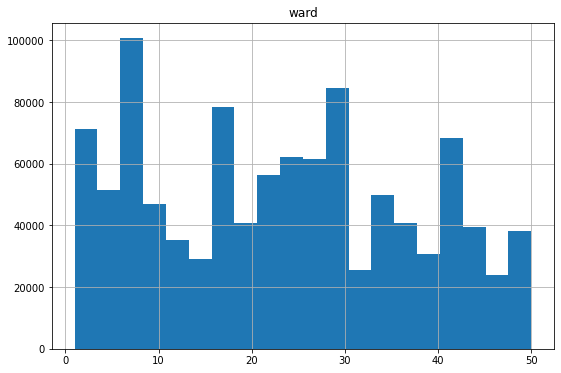

In [17]:
#Como Ward é um valor número iremos usar a mediana para preencher os valores faltantes.
df.hist(column='ward',figsize=(9,6),bins=20)


Análise do novo atributo Ward:
count    1.03e+06
mean     2.32e+01
std      1.39e+01
min      1.00e+00
25%      1.00e+01
50%      2.40e+01
75%      3.40e+01
max      5.00e+01
Name: ward, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bd38a6490>]],
      dtype=object)

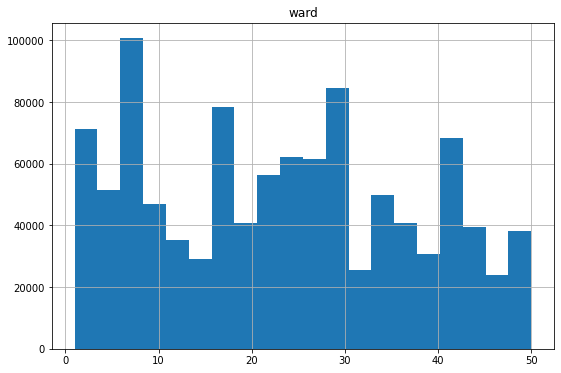

In [18]:
mediana = np.median([el for el in df["ward"] if (np.isnan(el) == False)])

new_ward = np.where(df["ward"].isnull(),mediana,df["ward"])
df["ward"] = new_ward

print("\nAnálise do novo atributo Ward:")
print(df["ward"].describe())

df.hist(column='ward',figsize=(9,6),bins=20)

In [19]:
#Verificando como ficaram os dados
df["ward"].unique()

array([ 9., 12., 11., 10., 23.,  3.,  8., 45., 19., 13., 41., 39., 50.,
       14.,  4., 36., 25., 29., 34., 33., 40., 21.,  5., 24., 49., 46.,
       48., 47., 32.,  1., 44., 43.,  2., 27., 42., 35., 38., 30., 31.,
       37., 26., 28., 22., 20.,  6.,  7., 17., 15., 16., 18.])

Os demais atributos não são importantes para nossa análise, dessa forma foi tomada a decisão de eliminar as linhas em que eles apareciam.

In [20]:
#Foi eliminado todas as linhas nulas
df = df.dropna() 

In [21]:
#Conferir se ficou algum valor sem ajustar
print("Número total de valores faltantes na base de dados: ", df.isna().sum().sum())

Número total de valores faltantes na base de dados:  0


# ANALISES SOBRE OS CRIMES DE CHICAGO

Será feita uma breve análise dos dados para poder entende-los melhor

**Principais crimes que ocorreram em Chicago de 2018 a 2021**

In [22]:
df['primary_type'].unique()

array(['CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'ASSAULT',
       'OTHER OFFENSE', 'BATTERY', 'OFFENSE INVOLVING CHILDREN',
       'CRIMINAL TRESPASS', 'ARSON', 'ROBBERY',
       'INTERFERENCE WITH PUBLIC OFFICER', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'CRIM SEXUAL ASSAULT', 'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT',
       'KIDNAPPING', 'SEX OFFENSE', 'THEFT', 'BURGLARY', 'HOMICIDE',
       'STALKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'HUMAN TRAFFICKING', 'LIQUOR LAW VIOLATION', 'OBSCENITY',
       'GAMBLING', 'OTHER NARCOTIC VIOLATION', 'PROSTITUTION',
       'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM'], dtype=object)

In [23]:
# Numero total de tipos de crimes
len(df['primary_type'].unique())

34

In [24]:
#Crimes que mais ocorreram por frequencia
df['primary_type'].value_counts().sort_values(ascending=False).head(34)

THEFT                                223705
BATTERY                              197195
CRIMINAL DAMAGE                      113230
ASSAULT                               87291
DECEPTIVE PRACTICE                    70594
OTHER OFFENSE                         65816
MOTOR VEHICLE THEFT                   44428
NARCOTICS                             40949
BURGLARY                              39456
ROBBERY                               36600
WEAPONS VIOLATION                     32640
CRIMINAL TRESPASS                     22881
OFFENSE INVOLVING CHILDREN             8941
PUBLIC PEACE VIOLATION                 5016
SEX OFFENSE                            4770
INTERFERENCE WITH PUBLIC OFFICER       3969
CRIMINAL SEXUAL ASSAULT                3967
HOMICIDE                               2959
CRIM SEXUAL ASSAULT                    2342
ARSON                                  2011
PROSTITUTION                           1904
STALKING                               1121
LIQUOR LAW VIOLATION            

In [25]:
#Conferindo se a informação acima está correta
df_theft=df[df['primary_type']=='THEFT']
df_theft.shape[0]

223705

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


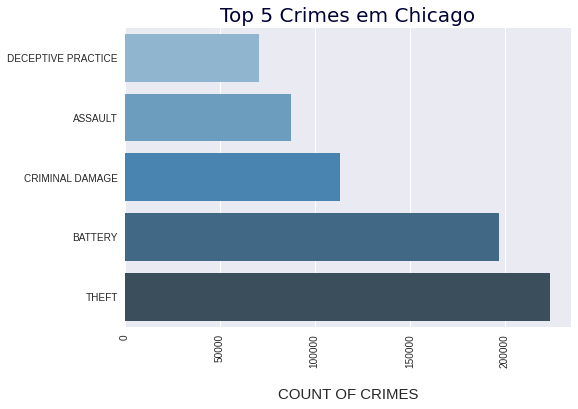

In [26]:
# Os cinco crimes mais frequentes
plt.style.use('seaborn')

top_5_crimes = df['primary_type'].value_counts().sort_values(ascending=False).head()

temp = df.groupby('primary_type', as_index=False).agg({"case_number": "count"})
temp = temp.sort_values(by=['case_number'], ascending=False).head()
temp = temp.sort_values(by='case_number', ascending=True)
sns.barplot(x='case_number', y='primary_type', data=temp, palette="Blues_d")

plt.title("Top 5 Crimes em Chicago", fontdict = {'fontsize': 20, 'fontname':'Arial', 'color': '#000235'})
plt.xlabel("\nCOUNT OF CRIMES", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

**Crimes não domésticos**

In [30]:
l = df["domestic"].value_counts()
false = l[0]
true = l[1]

arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(l)})
print("Porcentagem de crimes não domesticos :",false/(false+true)*100,'!')

Porcentagem de crimes não domesticos : 81.48581085006879 !


**Quantidades de crimes que resultaram em prisões**

In [31]:
l = df["arrest"].value_counts()
false = l[0]
true = l[1]

arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(l)})
print("Porcentagem de não ocorrer prisões nos crimes :",false/(false+true)*100,'!')

Porcentagem de não ocorrer prisões nos crimes : 82.47048871495551 !


**Crimes por Área**

In [105]:
top_5_District = df['district'].value_counts().sort_values(ascending=False).head(10)
top_5_District

11    70030
6     65679
8     62646
4     57103
7     53733
18    53350
25    52024
1     51740
12    51005
3     49864
Name: district, dtype: int64

# REGRESSÃO LINEAR



Para realização da regressão linear simples nesse trabalho percebeu-se a necessidade da criação de uma nova tabela com somente as informações que serão utilizadas na regressão e adicionando a coluna de quantiddades.

In [106]:
# Primeiramente adicionamos a coluna mes na Tabela principal.
df["mes"]=df['date'].str[5:7]
df.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,mes
0,11754235,JC344459,2019-07-11 01:00:00+00:00,006XX E 131ST ST,1340,CRIMINAL DAMAGE,TO STATE SUP PROP,CHA APARTMENT,False,False,533,5,9,54.0,14,1183077.0,1818560.0,2019,2019-07-19 04:09:50+00:00,41.657322883,-87.605741042,"(41.657322883, -87.605741042)",07
1,11878062,JC489708,2019-07-12 08:00:00+00:00,036XX S HERMITAGE AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,912,9,12,59.0,11,1165278.0,1880651.0,2019,2019-11-03 03:50:02+00:00,41.828103571,-87.669117016,"(41.828103571, -87.669117016)",07
2,11826405,JC431092,2019-09-13 12:40:00+00:00,001XX W 35TH ST,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,CTA PLATFORM,False,False,915,9,11,34.0,04A,1175739.0,1881773.0,2019,2019-09-20 04:01:26+00:00,41.830954079,-87.630703226,"(41.830954079, -87.630703226)",09
3,11839509,JC446735,2019-09-01 12:00:00+00:00,106XX S AVENUE M,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,False,432,4,10,52.0,26,1201520.0,1834968.0,2019,2019-09-27 04:00:25+00:00,41.701901013,-87.537701855,"(41.701901013, -87.537701855)",09
4,11759413,JC350783,2019-07-16 12:00:00+00:00,035XX S LEAVITT ST,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,CTA PLATFORM,False,False,912,9,12,59.0,14,1162269.0,1881166.0,2019,2019-07-23 04:21:39+00:00,41.829580097,-87.680142381,"(41.829580097, -87.680142381)",07


In [109]:
# Criamos um novo Dataframe com as informações: ano, mes, tipo de crime e quantidade
df_pt = df.groupby(['year','mes','primary_type'])['primary_type'].count().reset_index(name='qtd')

In [108]:
# Verificar nova tabela criada
df_pt.head()

,year,mes,primary_type,qtd
0,2018,01,ARSON,26
1,2018,01,ASSAULT,1414
2,2018,01,BATTERY,3584
3,2018,01,BURGLARY,950
4,2018,01,CONCEALED CARRY LICENSE VIOLATION,4


In [34]:
# Conferir as informações da tabela.
df_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          1559 non-null   int64 
 1   mes           1559 non-null   int64 
 2   primary_type  1559 non-null   object
 3   qtd           1559 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 48.8+ KB


In [111]:
#Verificando os dados númericos
df_pt.describe()

,year,qtd
count,1559.00,1559.00
mean,2019.72,651.35
std,1.31,1089.61
min,2018.00,1.00
25%,2019.00,17.00
50%,2020.00,101.00
75%,2021.00,843.00
max,2022.00,6411.00


In [112]:
# Verificando os dados catégoricos
categ = df_pt.dtypes[df_pt.dtypes == "object"].index

print("\n", df_pt[categ].describe(), sep='\n')



         mes primary_type
count   1559         1559
unique    12           34
top       05        ARSON
freq     147           54


### DETECTANDO OUTLIERS

Outliers são valores extremos. A estatística descritiva, em geral, provê um bom indicativo da presença de outliers, com valores máximos e mínimo muito distantes; o valor da média muito próximo de um máximo ou mínimo, mostrando problema de distribuição dos dados.

Registros com valores extremos:
     year mes primary_type   qtd
242  2018  08        THEFT  6411


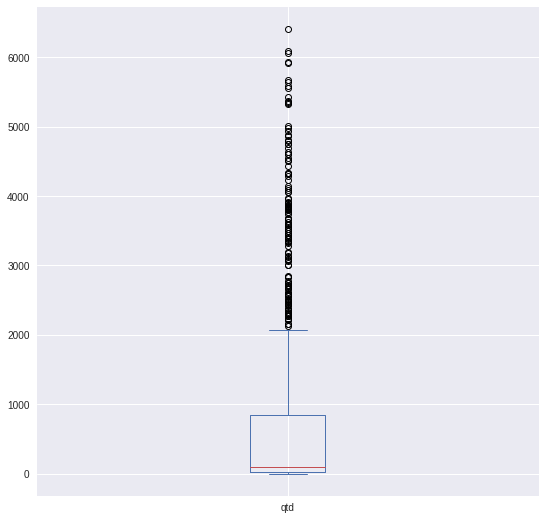

In [115]:
# De acordo com a analise númerica feita acima os dados de 'qtd' apresentam uma discrepancia do min e max alta, por isso iremos analisa-lo
df_pt["qtd"].plot(kind="box", figsize=(9,9))

index = np.where(df_pt["qtd"] == max(df_pt["qtd"]) )

print("Registros com valores extremos:",df_pt.loc[index], sep='\n')

In [36]:
# Iremos verificar a correlação dos atributos inteiros
int_fields = df_pt.dtypes[df_pt.dtypes == "int64"].index
corr = np.corrcoef(df_pt[int_fields].transpose())
correlacao = pd.DataFrame(data=corr, index=int_fields, columns=int_fields)

print("\nMatriz de correlação dos atributos inteiros:\n{0}".format(correlacao))


Matriz de correlação dos atributos inteiros:
      year   mes   qtd
year  1.00 -0.17 -0.06
mes  -0.17  1.00  0.02
qtd  -0.06  0.02  1.00


#Depois de analisados os dados podemos começar a regressão linear.
Primeiramente foi necessario definir o X e o Y do trabalho, sendo que o X é o mes que ocorreu o crime e o Y a quantidade de crimes.

In [37]:
X = df_pt[['mes']]
y = df_pt['qtd']

In [38]:
# Recupera os nomes dos atributos
X = X.fillna(0)
atributos = list(X)
rotulos = list(y)

train_test_split -  irá separar a base em "base de treinamento" e "base de teste" a partir de uma amostragem aleatória.

In [119]:
# Amostragem de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [117]:
print("Base de treinamento:{0}".format(X_train.shape))
print("Base de teste:{0}".format(X_test.shape))

Base de treinamento:(1403, 1)
Base de teste:(156, 1)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Regressão Linear (com atributos redundantes)")
print("Acurácia na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lr.score(X_test, y_test)))

Regressão Linear (com atributos redundantes)
Acurácia na base de treinamento: 0.00
Acurácia na base de teste: -0.01


Acurácia da base de treinamento: 0.00
Acurácia da base de testes: -0.01
Descrição do modelo: 
w: ['mes: 4.80']  b: 649.07
Número de atributos usados: 1
Erro percentual:
 Média: 56.84  Max: 705.66   Min: 0.01


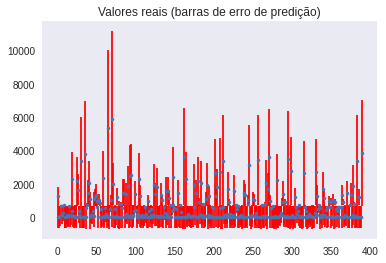

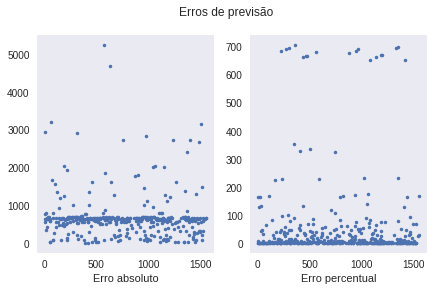

In [42]:
lnr = LinearRegression().fit(X_train, y_train)

y_prev = lnr.predict(X_test)

print("Acurácia da base de treinamento: {:.2f}".format(lnr.score(X_train, y_train)))
print("Acurácia da base de testes: {:.2f}".format(lnr.score(X_test, y_test)))
print("Descrição do modelo: ")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr.coef_)]
print("w: {}  b: {:.2f}".format(s, lnr.intercept_))
print("Número de atributos usados: {}".format(np.sum(lnr.coef_ != 0)))

# Calcula o erro absoluto e o erro percentual da regressao linear
errolnr = np.abs(y_test - y_prev)
erroperc = errolnr / list(y_test)

print('Erro percentual:\n Média: {0:.2f}  Max: {1:.2f}   Min: {2:.2f}'
      .format(np.mean(erroperc), np.max(erroperc), np.min(erroperc)))

plt.figure(figsize=(6, 4))
plt.errorbar(np.arange(y_test.size), list(y_test), yerr=errolnr,
             fmt='.', ecolor='r', capsize=3)
plt.title("Valores reais (barras de erro de predição)")
plt.grid()

fig, ax = plt.subplots(1, 2, figsize=(7, 4))
plt.suptitle("Erros de previsão")
ax[0].plot(errolnr,'.')
ax[0].set_xlabel("Erro absoluto")
ax[0].grid()
ax[1].plot(erroperc,'.')
ax[1].set_xlabel("Erro percentual")
ax[1].grid()

## Regras de associação geradas a partir de itemsets frequentes



Para essa regra de associação foram gerados os 7 principais crimes que ocorreram no ano de 2018,2019,2020 e 2021 por ordem de gravidade (ward)

In [43]:
# Baixar as extensões que permitem fazer a associação
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

In [93]:
# Crimes mais frequentes e violentos de 2018
top_violent_crimes_2018=df[df['year']==2018].groupby(['ward','primary_type'])['ward'].count().reset_index(name='qtd').sort_values(by = ['ward','qtd'],ascending=False).head(7)['primary_type'].to_list()
print(top_violent_crimes_2018)

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'BURGLARY', 'ASSAULT', 'OTHER OFFENSE']


In [94]:
# Crimes mais frequentes e violentos de 2019
top_violent_crimes_2019=df[df['year']==2019].groupby(['ward','primary_type'])['ward'].count().reset_index(name='qtd').sort_values(by = ['ward','qtd'],ascending=False).head(7)['primary_type'].to_list()
print(top_violent_crimes_2019)

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'BURGLARY', 'ASSAULT']


In [95]:
# Crimes mais frequentes e violentos de 2020
top_violent_crimes_2020=df[df['year']==2020].groupby(['ward','primary_type'])['ward'].count().reset_index(name='qtd').sort_values(by = ['ward','qtd'],ascending=False).head(7)['primary_type'].to_list()
print(top_violent_crimes_2020)

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'ASSAULT', 'BURGLARY', 'OTHER OFFENSE']


In [96]:
# Crimes mais frequentes e violentos de 2021
top_violent_crimes_2021=df[df['year']==2021].groupby(['ward','primary_type'])['ward'].count().reset_index(name='qtd').sort_values(by = ['ward','qtd'],ascending=False).head(7)['primary_type'].to_list()
print(top_violent_crimes_2021)

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'ASSAULT', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT']


Depois de levantados quais crimes foram mais frequentes e violentos dos anos de 2018 a 2021 foi feita a lista abaixo para entender a correlação desses crimes.

In [97]:
list_ass=[['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'BURGLARY', 'ASSAULT', 'OTHER OFFENSE'],
          ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'BURGLARY', 'ASSAULT'],
          ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'ASSAULT', 'BURGLARY', 'OTHER OFFENSE'],
          ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'ASSAULT', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT']]

In [120]:
#Nesta base, são considerados ```itemsets``` frequentes aqueles que possuírem suporte superior a 0.6.
te = TransactionEncoder()
te_ary = te.fit(list_ass).transform(list_ass)
df_ass = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_ass, min_support=0.6, use_colnames=True)

print(frequent_itemsets)

     support                                           itemsets
0       1.00                                          (ASSAULT)
1       1.00                                          (BATTERY)
2       0.75                                         (BURGLARY)
3       1.00                                  (CRIMINAL DAMAGE)
4       1.00                               (DECEPTIVE PRACTICE)
5       1.00                                    (OTHER OFFENSE)
6       1.00                                            (THEFT)
7       1.00                                 (BATTERY, ASSAULT)
8       0.75                                (BURGLARY, ASSAULT)
9       1.00                         (CRIMINAL DAMAGE, ASSAULT)
10      1.00                      (DECEPTIVE PRACTICE, ASSAULT)
11      1.00                           (ASSAULT, OTHER OFFENSE)
12      1.00                                   (THEFT, ASSAULT)
13      0.75                                (BURGLARY, BATTERY)
14      1.00                         (BA

###Regras de associação

Gera regras de associação com confiança mínima de 0.7.

In [102]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BATTERY),(ASSAULT),1.00,1.00,1.00,1.00,1.0,0.0,inf
1,(ASSAULT),(BATTERY),1.00,1.00,1.00,1.00,1.0,0.0,inf
2,(BURGLARY),(ASSAULT),0.75,1.00,0.75,1.00,1.0,0.0,inf
3,(ASSAULT),(BURGLARY),1.00,0.75,0.75,0.75,1.0,0.0,1.0
4,(CRIMINAL DAMAGE),(ASSAULT),1.00,1.00,1.00,1.00,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
1927,(BATTERY),"(THEFT, BURGLARY, CRIMINAL DAMAGE, OTHER OFFEN...",1.00,0.75,0.75,0.75,1.0,0.0,1.0
1928,(CRIMINAL DAMAGE),"(THEFT, BURGLARY, BATTERY, OTHER OFFENSE, DECE...",1.00,0.75,0.75,0.75,1.0,0.0,1.0
1929,(OTHER OFFENSE),"(THEFT, BURGLARY, CRIMINAL DAMAGE, BATTERY, DE...",1.00,0.75,0.75,0.75,1.0,0.0,1.0
1930,(DECEPTIVE PRACTICE),"(THEFT, BURGLARY, CRIMINAL DAMAGE, BATTERY, OT...",1.00,0.75,0.75,0.75,1.0,0.0,1.0


Como os valores do atributo LIFT foram todos 1.0, isso demostra que todos os itens possuem casualizada relevante e devem ser considerados nas previsões.